# Machine Learning Project 

## Flow of project
- Understanding the Problem Statement or Insides Abouts The Data 
- Data Collection or Data Importing
- Data Checks to perform
- Exploratory data analysis (EDA)
- Data Pre-Processing
- Model Training
- Selecting best model

### 1.1)Importing neccessary Lib

In [258]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Importing data or collecting of data

In [259]:
data = pd.read_csv("E:\\Working\\Ineuron_intership\\notebook\\data\\adult.csv")

In [260]:
df = data.copy()

#### Checking data 

In [261]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [262]:
cate_col=df.select_dtypes(include='O').columns

In [263]:
num_col=df.select_dtypes(exclude='O').columns

### Basis steps for Preprocessing of Data

In [264]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [265]:
df.describe(exclude='O')

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [266]:
def get_change(test):
    for req in test:
        df[req].replace(" ?",np.NaN,inplace=True)

This function is used to convert question marks(?) into the null value 

In [267]:
get_change(df)

In [268]:
df['workclass'].value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [269]:
df.country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [270]:
df.shape

(32561, 15)

In [271]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

by there are question mark (?) in ['workclass','occupation','country] column so we convert this into the null values 

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [273]:
df[(df['workclass'].isna())&(df['occupation'].isna()&(df['country'].isna()))]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
297,39,NaN,157443,Masters,14,Married-civ-spouse,NaN,Wife,Asian-Pac-Islander,Female,3464,0,40,NaN,<=50K
1152,24,NaN,35633,Some-college,10,Never-married,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
1676,64,NaN,168340,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,NaN,>50K
2513,47,NaN,174525,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,3942,0,40,NaN,<=50K
3131,25,NaN,237865,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,NaN,<=50K
3579,21,NaN,180303,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Male,0,0,25,NaN,<=50K
3834,32,NaN,169886,Bachelors,13,Never-married,NaN,Not-in-family,White,Female,0,0,20,NaN,<=50K
6059,35,NaN,163582,10th,6,Divorced,NaN,Unmarried,White,Female,0,0,16,NaN,<=50K
7862,29,NaN,125159,Some-college,10,Never-married,NaN,Not-in-family,Black,Male,0,0,36,NaN,<=50K


here by this we can say null are inside 3 same column so we should remove this


In [274]:
df.duplicated().sum()

24

In [275]:
df.dropna(subset=['workclass','occupation'],inplace=True)

by using dropna function dropping null values 

In [276]:
df.isna().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
country           556
salary              0
dtype: int64

In [277]:
df['country'].fillna("United-States",inplace=True)

In [278]:
df['country'].mode()

0     United-States
Name: country, dtype: object

FILLNA :- is used for filling null values here we fill this by most occurance or we can say by replaced null value by most occurance value

In [279]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [280]:
df.country.value_counts()

country
 United-States                 27504
 Mexico                          610
United-States                    556
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                         

In [281]:
df['country']=df['country'].replace({
                                    "United-States":" United-States",
                                    "0     United-States\nName: country, dtype: object":" United-States",
                                    " Outlying-US(Guam-USVI-etc)":" United-States"
                                     })

in column there are country name defined by other names so here we reaplaced other with country name

In [282]:
df.country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Scotland', ' Trinadad&Tobago', ' Greece', ' Nicaragua',
       ' Vietnam', ' Hong', ' Ireland', ' Hungary', ' Holand-Netherlands'],
      dtype=object)

In [283]:
df.country.value_counts()

country
 United-States         28074
 Mexico                  610
 Philippines             188
 Germany                 128
 Puerto-Rico             109
 Canada                  107
 India                   100
 El-Salvador             100
 Cuba                     92
 England                  86
 Jamaica                  80
 South                    71
 China                    68
 Italy                    68
 Dominican-Republic       67
 Vietnam                  64
 Guatemala                63
 Japan                    59
 Poland                   56
 Columbia                 56
 Iran                     42
 Taiwan                   42
 Haiti                    42
 Portugal                 34
 Nicaragua                33
 Peru                     30
 Greece                   29
 France                   27
 Ecuador                  27
 Ireland                  24
 Hong                     19
 Cambodia                 18
 Trinadad&Tobago          18
 Laos                     17
 Thail

In [284]:
def get_enquire(data):
    for i in data.columns:
        print(f"column name : {i}")
        print(f"null values : {df[i].isna().sum()}")
        print(f"unique values : {df[i].nunique()}")
        print(f"column type : {df[i].dtypes}")
        print("="*50)
        
        
get_enquire(df)

column name : age
null values : 0
unique values : 72
column type : int64
column name : workclass
null values : 0
unique values : 7
column type : object
column name : fnlwgt
null values : 0
unique values : 20495
column type : int64
column name : education
null values : 0
unique values : 16
column type : object
column name : education-num
null values : 0
unique values : 16
column type : int64
column name : marital-status
null values : 0
unique values : 7
column type : object
column name : occupation
null values : 0
unique values : 14
column type : object
column name : relationship
null values : 0
unique values : 6
column type : object
column name : race
null values : 0
unique values : 5
column type : object
column name : sex
null values : 0
unique values : 2
column type : object
column name : capital-gain
null values : 0
unique values : 118
column type : int64
column name : capital-loss
null values : 0
unique values : 90
column type : int64
column name : hours-per-week
null values : 0
un

this function is used for checking information null values , unique value and datatype 

In [285]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [286]:
df['workclass'].value_counts().reset_index(name='total_values')

,workclass,total_values
0,Private,22696
1,Self-emp-not-inc,2541
2,Local-gov,2093
3,State-gov,1298
4,Self-emp-inc,1116
5,Federal-gov,960
6,Without-pay,14


Total no of persons are working in each categories

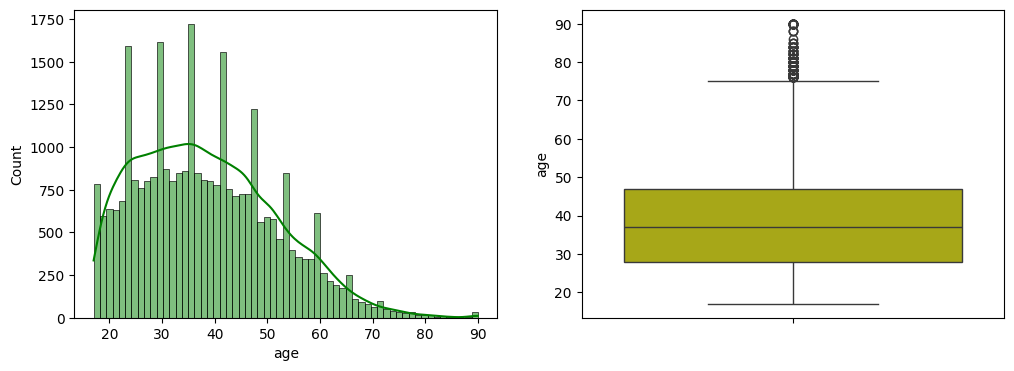

In [204]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
plt.subplot(121)
sns.histplot(x=df['age'],kde=True,color='g')

plt.subplot(122)
sns.boxplot(df['age'],color='y')
plt.show()

#### Insights
Above graph shows that it is a right hand skew or positive skewed and by box plot there are outliers above upper limit

In [205]:
df['age'].mean()

38.44358356663845

In [206]:
df.shape

(30718, 15)

In [207]:
def outlier_detection(data,column_name):
    q1= data[column_name].quantile(0.10)
    q3= data[column_name].quantile(0.75)
    IQR=q3-q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    df.loc[(df[column_name] > upper_limit), column_name]=upper_limit
    df.loc[(df[column_name] < lower_limit), column_name]=lower_limit
    print(lower_limit)
    print(upper_limit)

#### Insights
In age column there are some data points which are act as outliers so by this function we replaced with upper limit and lower limit

this function is used to find and replace outliers by using IQR method

In [208]:
outlier_detection(df,'age')

-15.5
84.5


In [209]:
df['age'].max()

84.5

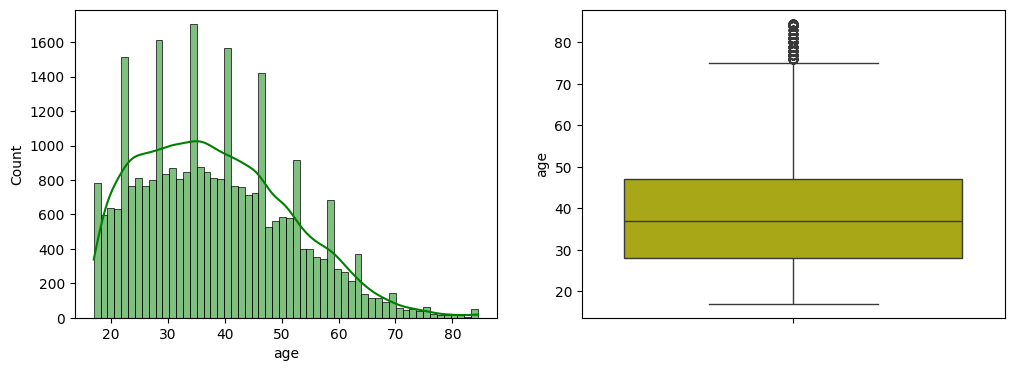

In [210]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
plt.subplot(121)
sns.histplot(x=df['age'],kde=True,color='g')

plt.subplot(122)
sns.boxplot(df['age'],color='y')
plt.show()

In [211]:
df.drop(labels=['fnlwgt','education'],axis=1,inplace=True)

#### Insights
    fnlwgt and education :- are drop 
    fnlwgt are less corr with Target column 
    education column are categorical column and education & education-num impligts the same so we can remove educatio column


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize  distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)
- Box plot
- Pairplo 
- Pie plot
- Line plot

and some others 

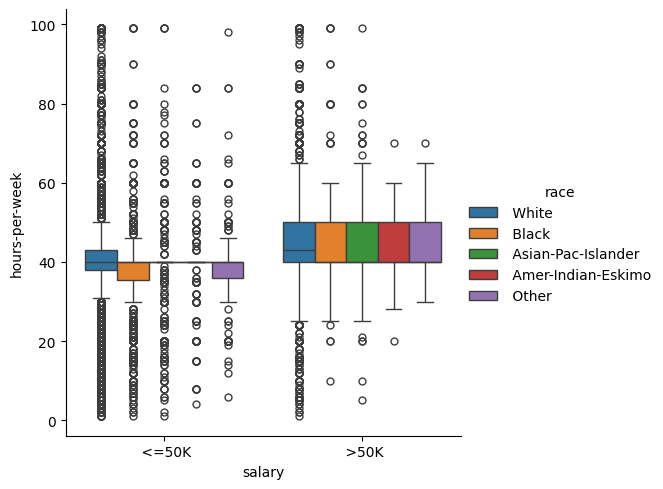

In [212]:
sns.catplot(data=df, x="salary", y="hours-per-week",hue='race', kind="box")

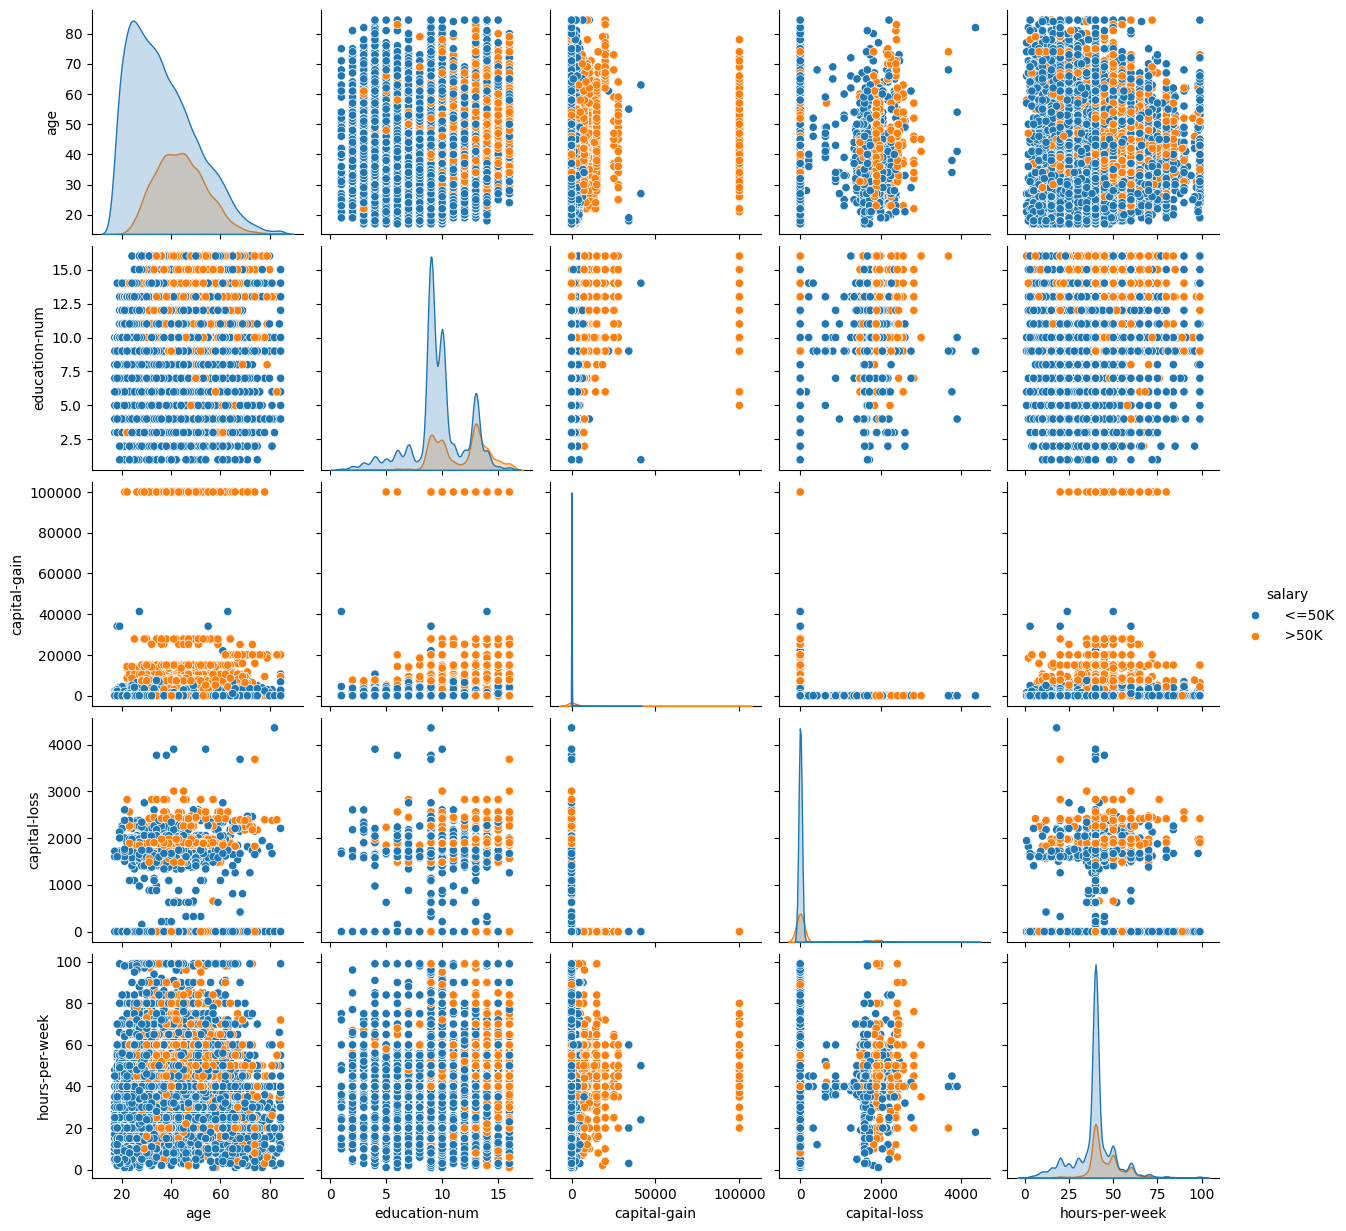

In [213]:
sns.pairplot(data=df,kind="scatter",hue='salary')

#### MUTIVARIATE ANALYSIS USING PAIRPLOT
Scatter plot :- - From the above plot it is clear that all the data points increase linearly with each other.

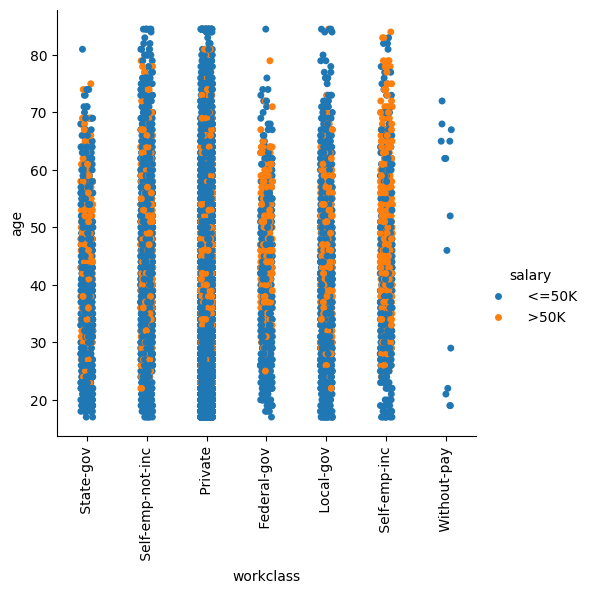

In [214]:

sns.catplot(data=df, x="workclass", y="age",hue='salary')
plt.xticks(rotation=90)
plt.show()


#### Insights 
Univariate Analysis :- In every job sector No of less salary are high 

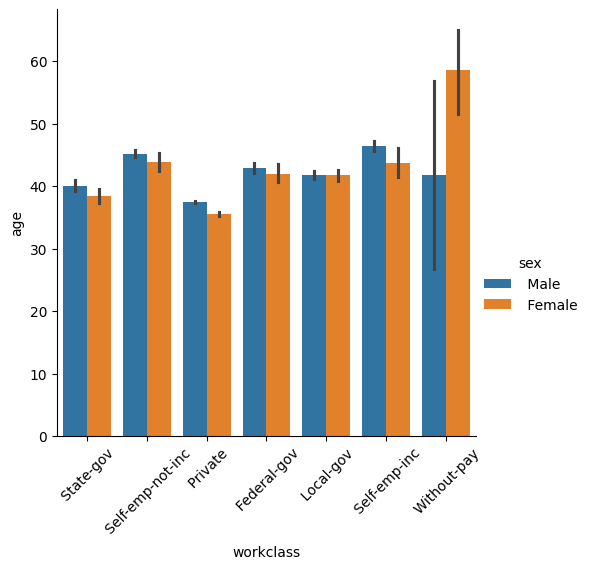

In [215]:
sns.catplot(data=df, x="workclass", y="age", hue="sex", kind="bar")
plt.xticks(rotation=45)
plt.show()

<Figure size 1500x1500 with 0 Axes>

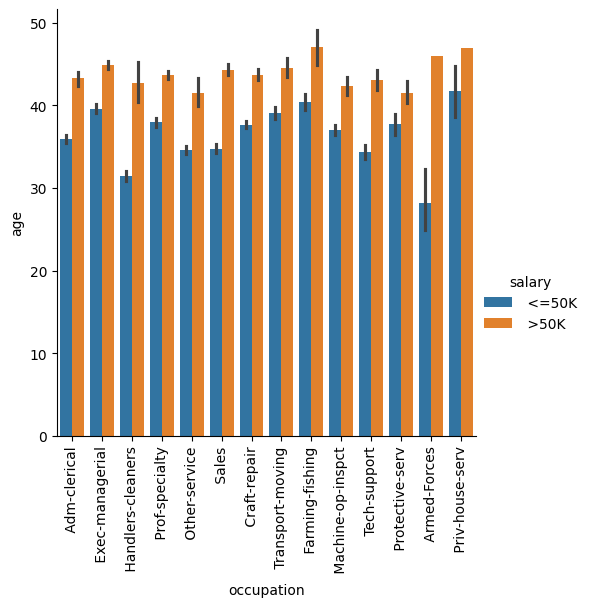

In [216]:
plt.figure(figsize=(15,15))
sns.catplot(data=df, x="occupation", y="age", hue="salary", kind="bar")
plt.xticks(rotation=90)
plt.show()

#### Insights
as higher age salary will be slighty high 

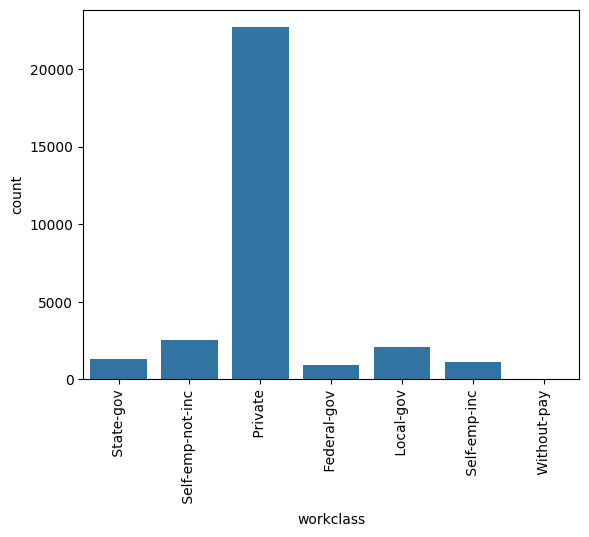

In [217]:
sns.countplot(data=df,x='workclass')
plt.xticks(rotation=90)
plt.show()

### Obsevation 
here by this we can say that in private sector numbers of population is high as compare to the other 

In [218]:
df.groupby(['workclass'])['salary'].value_counts()

workclass          salary
 Federal-gov        <=50K      589
                    >50K       371
 Local-gov          <=50K     1476
                    >50K       617
 Private            <=50K    17733
                    >50K      4963
 Self-emp-inc       >50K       622
                    <=50K      494
 Self-emp-not-inc   <=50K     1817
                    >50K       724
 State-gov          <=50K      945
                    >50K       353
 Without-pay        <=50K       14
Name: count, dtype: int64

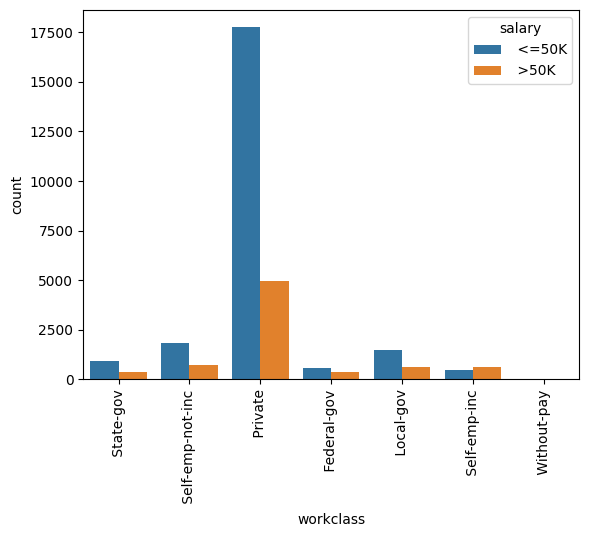

In [219]:
sns.countplot(
    data=df,
    x='workclass',
    hue='salary')

plt.xticks(rotation=90)
plt.show()

#### Insights
This ghaph shows that in every workclass sector no of count with less salary high but only self emp inc has high pic as compare to other

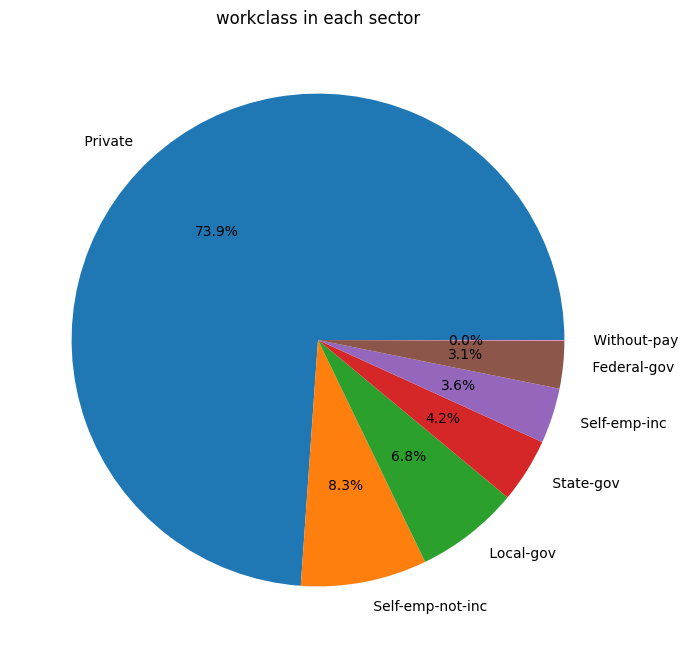

In [220]:

plt.figure(figsize=(15,8))
plt.pie(
    data=df,
    x=df['workclass'].value_counts(),
    autopct="%1.1f%%",
    labels=df['workclass'].value_counts().index
    )
plt.title('workclass in each sector')
plt.show()

#### Insigths 
One third of population are belongs from private sector

<Axes: xlabel='age', ylabel='Density'>

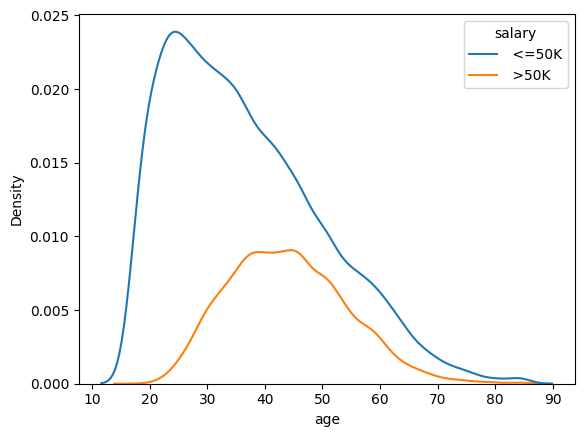

In [221]:
sns.kdeplot(x='age', data=df, hue='salary')

#### Insights
    <=50k :- age between 22 to 28 are at peak in the graph
    >50k :- In this age between 35 to 45 are has high no of salary

In [222]:
df.groupby(['education-num'])['occupation'].value_counts().sort_index(ascending=True)

education-num  occupation        
1               Adm-clerical           2
                Craft-repair           4
                Farming-fishing        9
                Handlers-cleaners      2
                Machine-op-inspct     11
                                    ... 
16              Other-service          1
                Prof-specialty       321
                Sales                  8
                Tech-support           3
                Transport-moving       1
Name: count, Length: 201, dtype: int64

### Observation :-
education and education_num both are describing the same thing so we can drop education column

In [223]:
df.groupby(['marital-status'])['salary'].value_counts()

marital-status          salary
 Divorced                <=50K    3801
                         >50K      457
 Married-AF-spouse       <=50K      11
                         >50K       10
 Married-civ-spouse      <=50K    7818
                         >50K     6521
 Married-spouse-absent   <=50K     356
                         >50K       33
 Never-married           <=50K    9430
                         >50K      482
 Separated               <=50K     893
                         >50K       66
 Widowed                 <=50K     759
                         >50K       81
Name: count, dtype: int64

<Axes: xlabel='hours-per-week', ylabel='Density'>

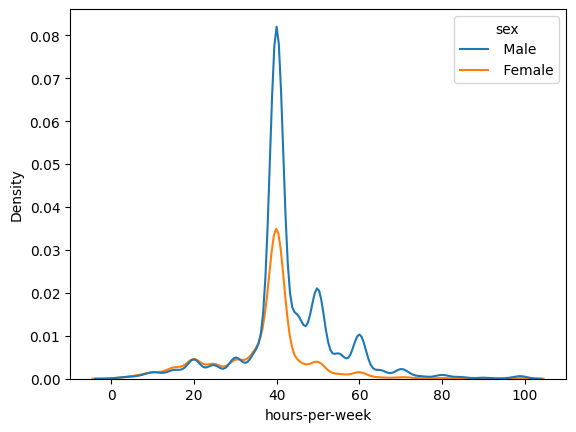

In [224]:
sns.kdeplot(x='hours-per-week',
            hue="sex",
            data=df)

### Observation :-
working hour of male is high as compare to female 
    > Male spend more working hour as compare to female

<Axes: xlabel='hours-per-week', ylabel='Density'>

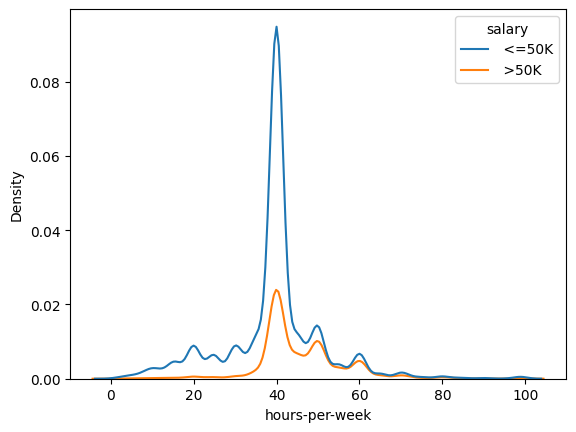

In [225]:
sns.kdeplot(x='hours-per-week',
            hue="salary",
            data=df)

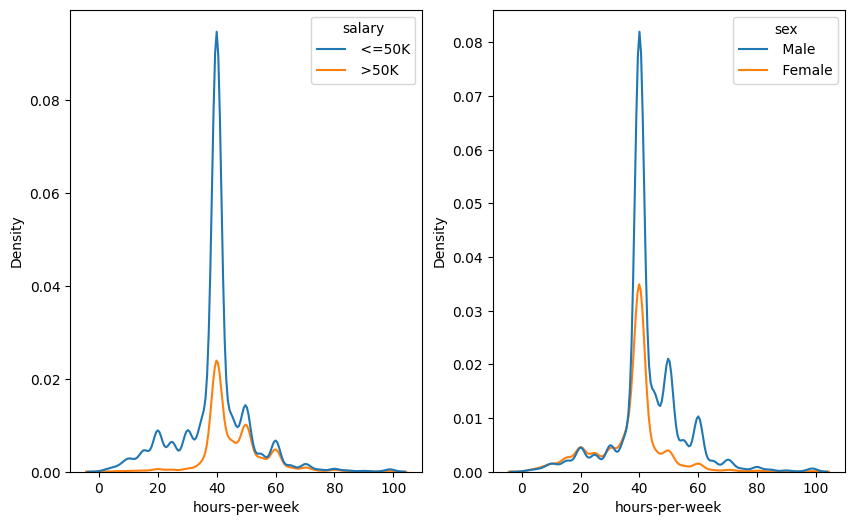

In [229]:
plt.subplots(1,2,figsize=(10,6))

plt.subplot(121)
sns.kdeplot(x='hours-per-week',
            hue="salary",
            data=df)

plt.subplot(122)
sns.kdeplot(x='hours-per-week',
            hue="sex",
            data=df)

plt.show()

### Observation :-
here we can clearly say male spend more time so there income also be high as compare to female

<Axes: xlabel='occupation'>

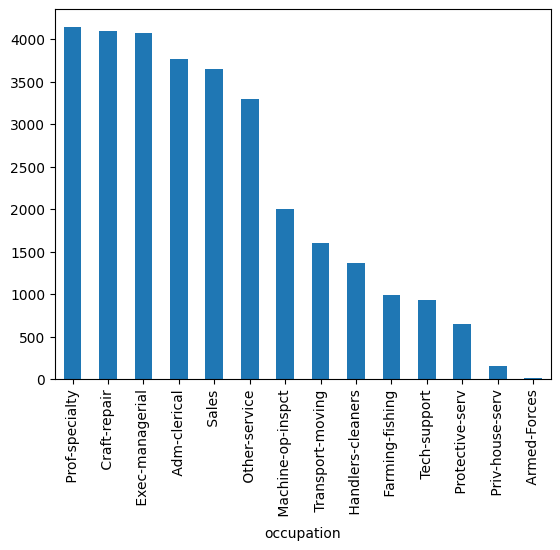

In [230]:
df['occupation'].value_counts().plot(kind="bar")

#### Insigts 
    . Prof-Speciality has higher no of counts
    . Armed-Foreces has list no of count

In [231]:
x=df.groupby(['workclass','sex'])['salary'].value_counts().reset_index()

In [232]:
x

,workclass,sex,salary,count
0,Federal-gov,Female,<=50K,259
1,Federal-gov,Female,>50K,56
2,Federal-gov,Male,<=50K,330
3,Federal-gov,Male,>50K,315
4,Local-gov,Female,<=50K,681
5,Local-gov,Female,>50K,154
6,Local-gov,Male,<=50K,795
7,Local-gov,Male,>50K,463
8,Private,Female,<=50K,7026
9,Private,Female,>50K,726


#### Insights 
In groupby function help us to find the value counts of each sector with respect to salary and sex 

<Axes: ylabel='count'>

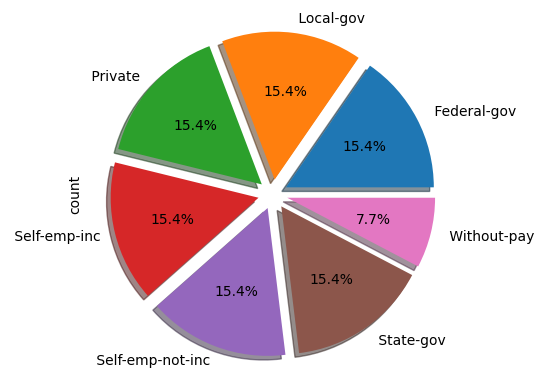

In [233]:
x['workclass'].value_counts().plot(kind='pie',shadow=True,autopct="%1.1f%%",explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1])

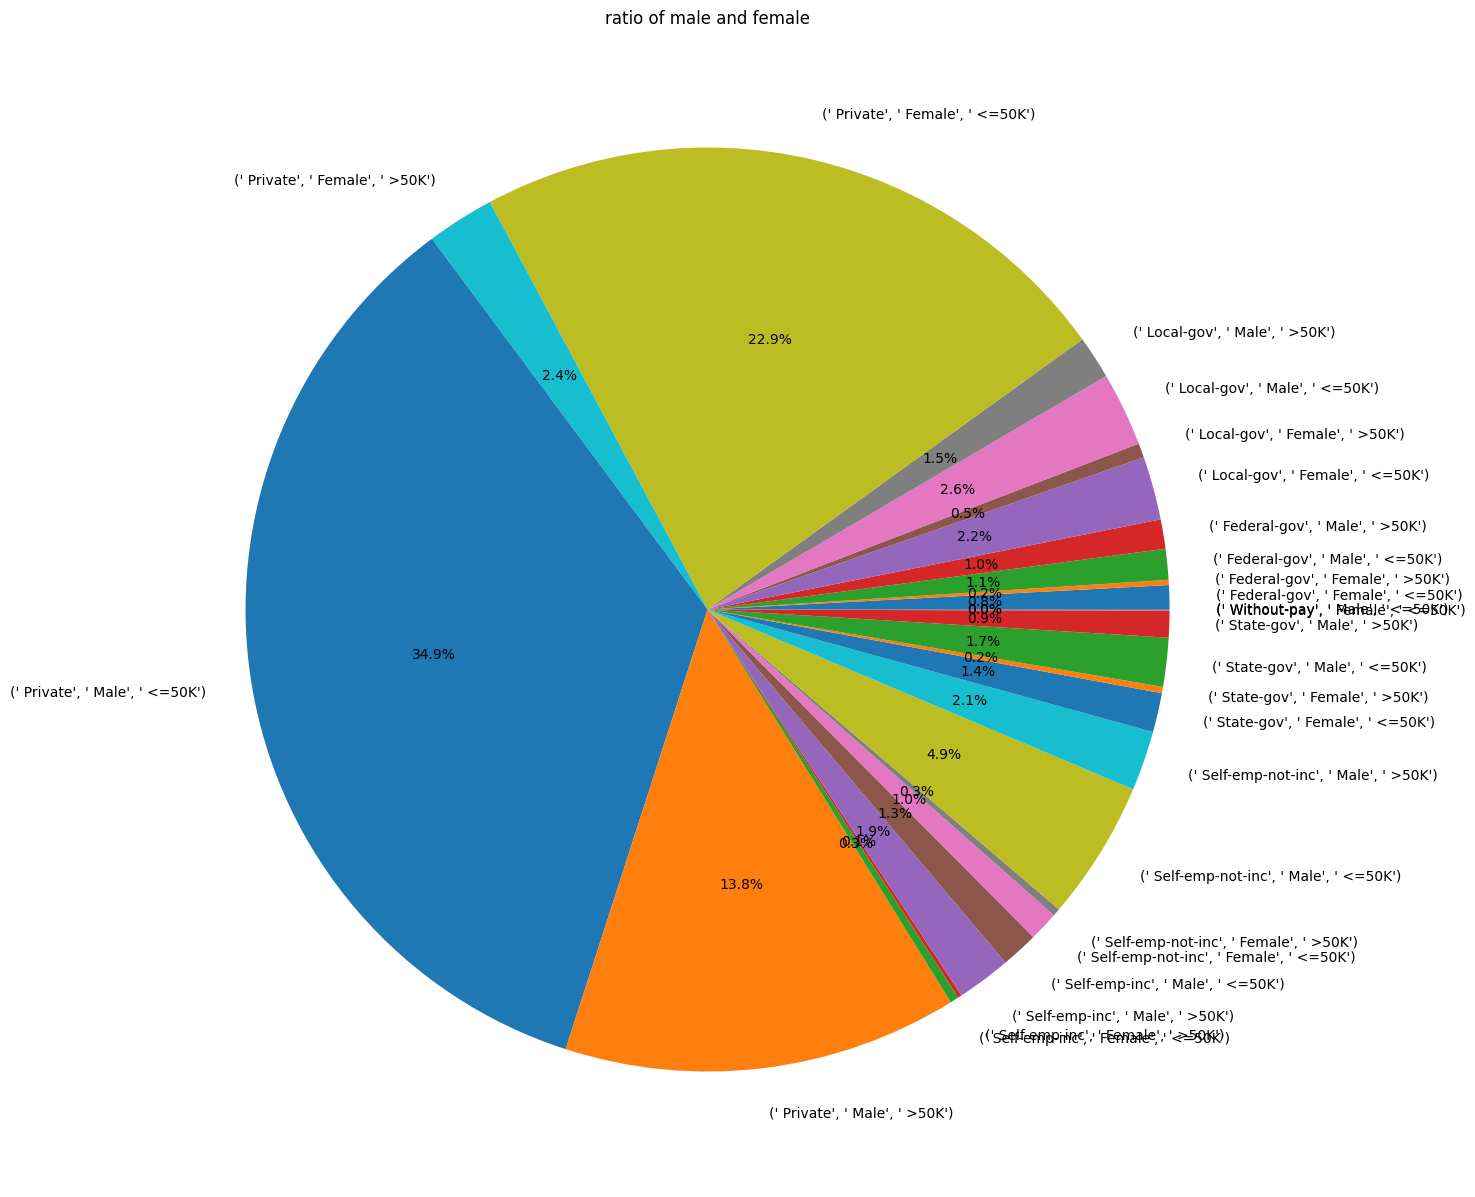

In [234]:
plt.figure(figsize=(20,15))
plt.pie(x=df.groupby(['workclass','sex'])['salary'].value_counts(),
        autopct="%1.1f%%",
        labels=df.groupby(['workclass','sex'])['salary'].value_counts().index)
plt.title("ratio of male and female")
plt.show()

male ratio is high as compare to female in private sector

In [235]:
df['marital-status'].value_counts().index

Index([' Married-civ-spouse', ' Never-married', ' Divorced', ' Separated',
       ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype='object', name='marital-status')

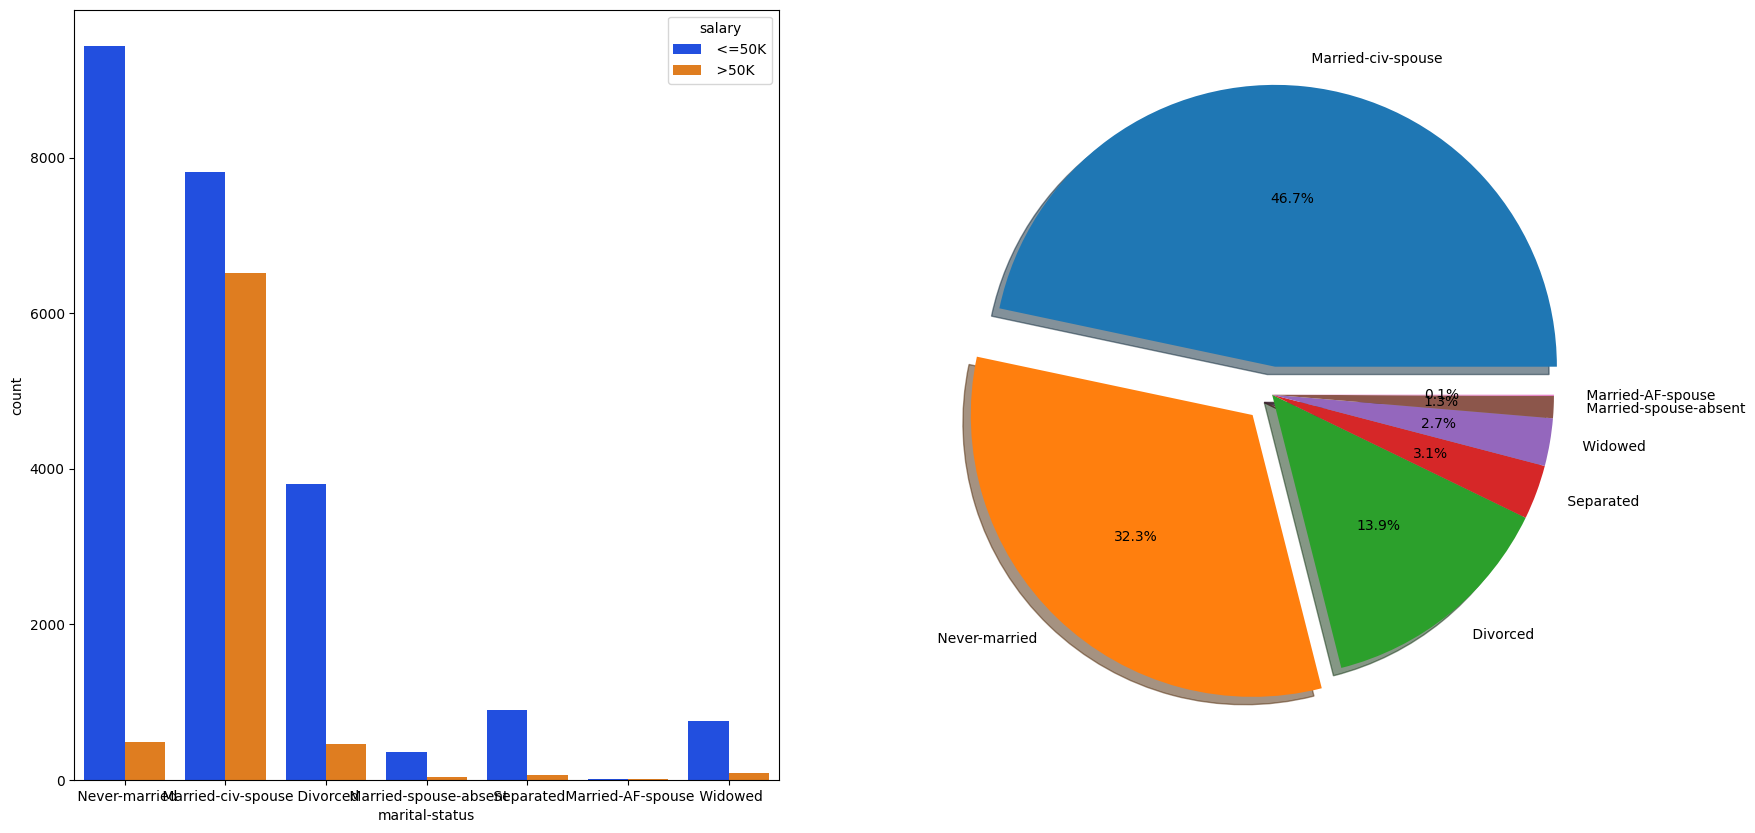

In [236]:

fg,ax=plt.subplots(1,2,figsize=(20,10))

sns.countplot(
                x=df['marital-status'],
                palette="bright",
                ax=ax[0],
                hue=df['salary']
                )

plt.xticks(rotation=90)

plt.pie(
        x=df['marital-status'].value_counts(),
        labels=df['marital-status'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0.1,0.1,0,0,0,0,0]
        )

plt.show()

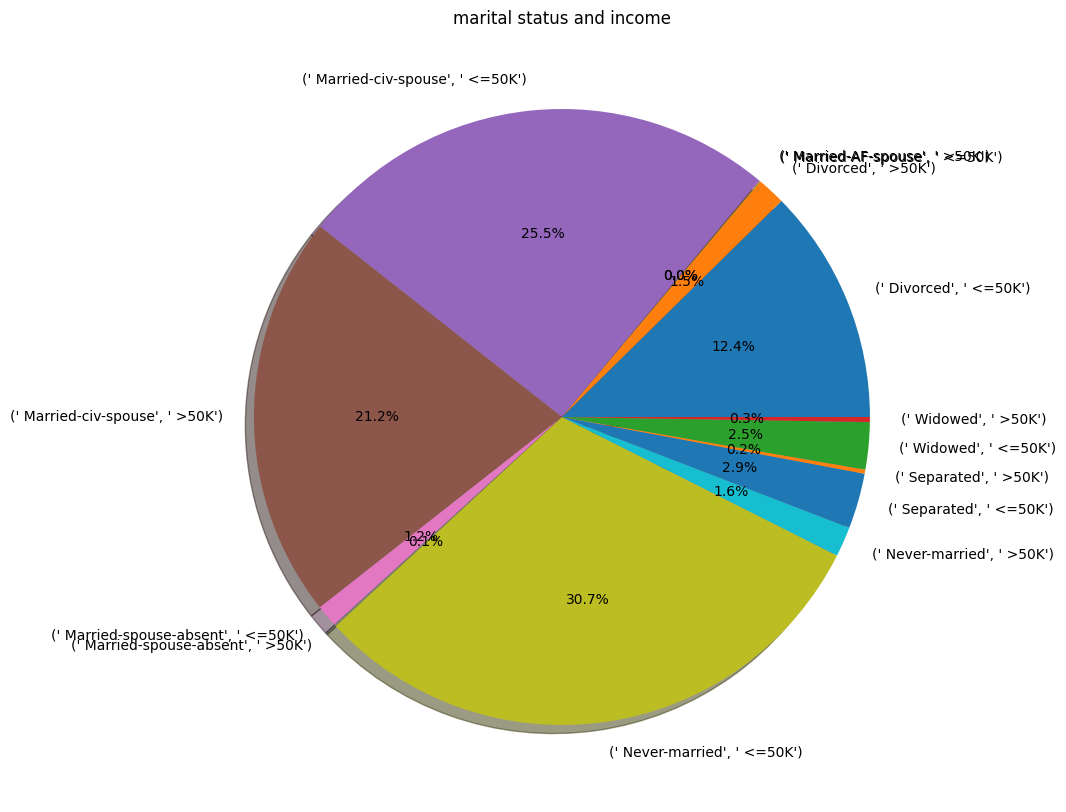

In [237]:
plt.figure(figsize=(10,10))
plt.pie(x=df.groupby(['marital-status'])['salary'].value_counts(),
        autopct="%1.1f%%",
        shadow=True,
        labels=df.groupby(['marital-status'])['salary'].value_counts().index)
plt.title("marital status and income")
plt.show()

In [238]:
x=df.groupby(['workclass','salary'])['hours-per-week'].mean().reset_index()

In [239]:
x

,workclass,salary,hours-per-week
0,Federal-gov,<=50K,40.093379
1,Federal-gov,>50K,43.420485
2,Local-gov,<=50K,39.739837
3,Local-gov,>50K,43.956240
4,Private,<=50K,38.802290
5,Private,>50K,45.500907
6,Self-emp-inc,<=50K,47.135628
7,Self-emp-inc,>50K,50.154341
8,Self-emp-not-inc,<=50K,43.517336
9,Self-emp-not-inc,>50K,46.691989


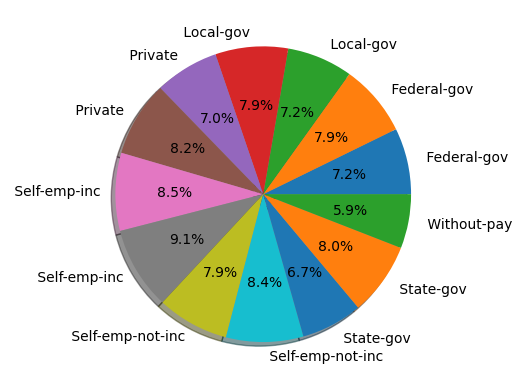

In [240]:
plt.pie(
        x=x["hours-per-week"],
        labels=x['workclass'],
        autopct='%1.1f%%',
        shadow=True
        #explode=[0.1,0.1,0,0,0,0,0]
        )

plt.show()

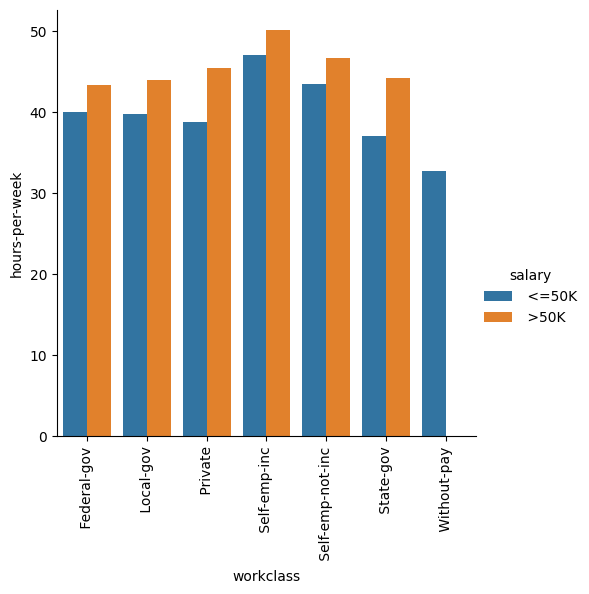

In [241]:
sns.catplot(data=x, x="workclass", y="hours-per-week", hue="salary", kind="bar")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='hours-per-week', ylabel='Count'>

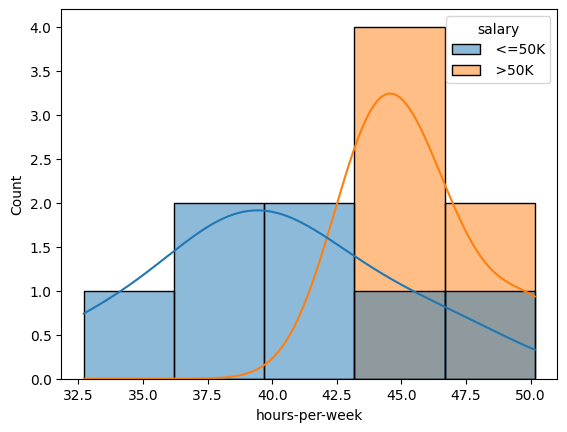

In [242]:
sns.histplot(data=x,x='hours-per-week',kde=True,color="g",hue="salary")

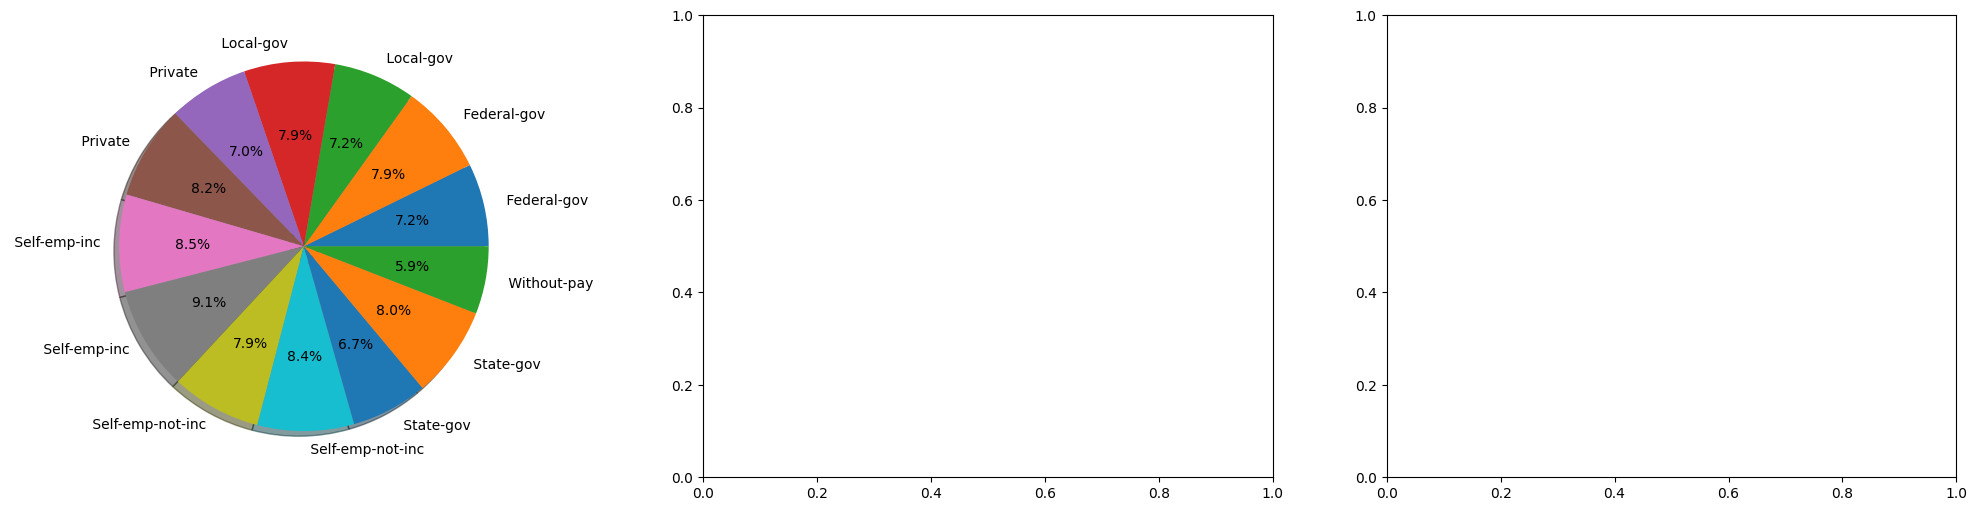

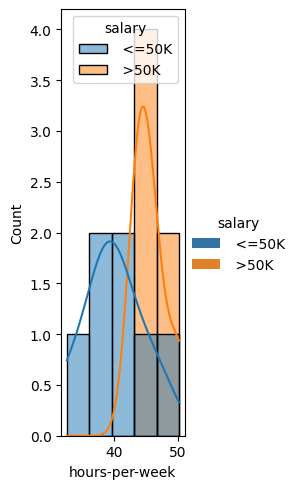

In [243]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(131)  # First subplot
plt.pie(
    x=x["hours-per-week"],
    labels=x['workclass'],
    autopct='%1.1f%%',
    shadow=True
    #explode=[0.1,0.1,0,0,0,0,0]
)

plt.subplot(132)  # Second subplot
sns.catplot(data=x, 
            x="workclass",
            y="hours-per-week",
            hue="salary",
            kind="bar")
plt.xticks(rotation=90)

plt.subplot(133)  # Third subplot
sns.histplot(data=x,
             x='hours-per-week',
             kde=True,
             color="g",
             hue="salary")
plt.show()


In [244]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39.0,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50.0,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28.0,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [245]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [291]:
data_1 = df.copy()
def data_labeled(data_1):
    for i in data_1.columns:
        if data_1[i].dtypes == 'O':
            data_1[i] =label.fit_transform(data_1[i])
            #return data_1
        else:
            pass
        

In [292]:
data_labeled(data_1)

In [293]:
data_1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,37,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,37,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,37,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,37,0


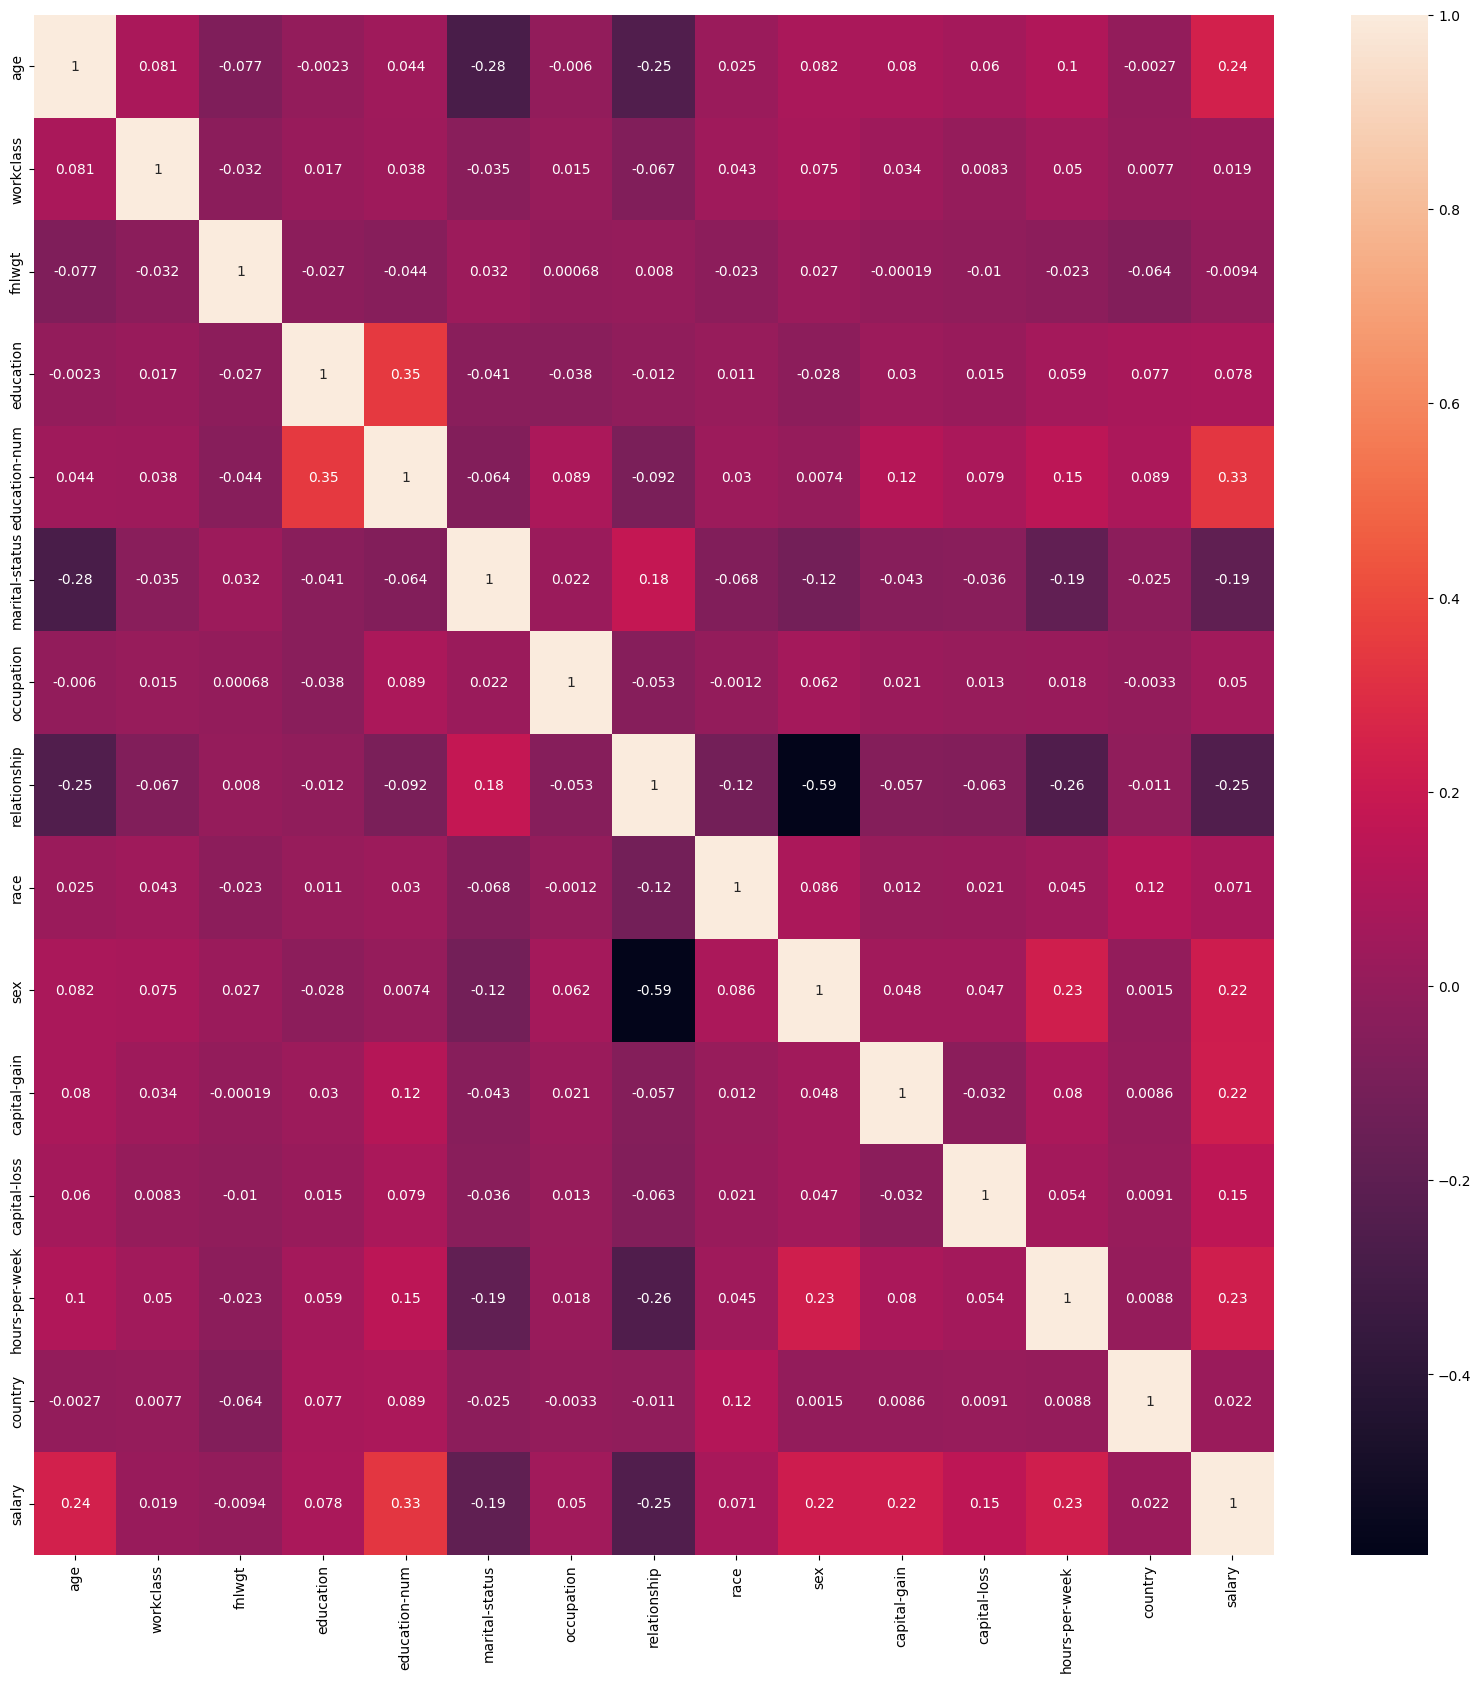

In [294]:
plt.figure(figsize=(20,20))
sns.heatmap(data_1.corr(),annot=True)
plt.show()

#### Insights
    > Age               :- 0.24
    > Workclass         :- 0.019
    > Fnlwgt            :- -0.0094
    > education - num   :- Are highly coorelated with Target column
    > Marital-Status    :- Negative corr with target column 
    > Occupation        :- 0.05
    > Relationship      :- -0.25 Negative corr
    > Race              :- 0.071
    > Sex               :- 0.22
    > capital-gain      :- 0.22
    > Captital Loss     :- 0.15
    > Hour-per-week     :- 0.23
    > Country           :- 0.022